In [37]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
charity_df = pd.read_csv('charity_data.csv')

# drop rows with null values
charity_df = charity_df.dropna()

charity_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...,...,...
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [38]:
# check the distribution of Is Successful
charity_df.IS_SUCCESSFUL.value_counts()

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

In [39]:
# check the distribution of Status
charity_df.STATUS.value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [40]:
status0_df = charity_df.loc[charity_df['STATUS'] == 0]
status0_df

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
2816,205559542,INTERNATIONAL FEDERATION OF FLY FISHERS INC,T3,CompanySponsored,C2000,CommunityServ,Trust,0,0,N,5000,1
2928,205918776,THE STEWART FOUNDATION INC,T3,Independent,C1000,Preservation,Trust,0,25000-99999,Y,7287,1
10155,330970564,META POINT INC,T3,Independent,C1000,Preservation,Trust,0,10000-24999,N,5000,1
20518,510594485,MOMS CLUB,T3,CompanySponsored,C2100,CommunityServ,Association,0,0,N,5000,0
29590,841164329,SKYVIEW VILLAGE INC SENIOR HOUSING,T3,Independent,C1000,Preservation,Association,0,0,N,5000,0


In [41]:
# make a copy of charity df and drop columns not needed
df = charity_df.copy()
df = df.drop(['EIN', 'NAME', 'STATUS'], axis=1)
df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,0,N,5000,1


In [42]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()
df_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [43]:
# Check the number of unique values in each column
df[df_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [44]:
# Print out the application type value counts
app_type_counts = df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [45]:
# Determine which values to replace
replace_app_types = list(app_type_counts[app_type_counts < 100].index)

# Replace in DataFrame
for app_type in replace_app_types:
    df.APPLICATION_TYPE = df.APPLICATION_TYPE.replace(app_type,"Other")


# Check to make sure binning was successful
df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [46]:
# Print out the Classification value counts
classification_counts = df.CLASSIFICATION.value_counts()
classification_counts[:10]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

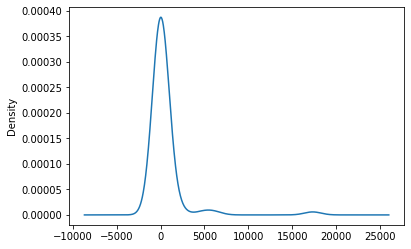

In [47]:
# Visualize the value counts
classification_counts.plot.density()

In [48]:
# Determine which values to replace
replace_classification = list(classification_counts[classification_counts < 150].index)

# Replace in DataFrame
for classification in replace_classification:
    df.CLASSIFICATION = df.CLASSIFICATION.replace(classification,"Other")


# Check to make sure binning was successful
df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1003
C7000      777
C1700      287
C4000      194
Name: CLASSIFICATION, dtype: int64

In [49]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Split preprocessed data into features and target arrays
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [52]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Single hidden layer, 16 nodes, relu activation, 100 epochs

In [53]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16

# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.6147 - accuracy: 0.6936
Epoch 2/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5652 - accuracy: 0.7235
Epoch 3/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5593 - accuracy: 0.7269
Epoch 4/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5563 - accuracy: 0.7277
Epoch 5/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5547 - accuracy: 0.7282
Epoch 6/100
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5531 - accuracy: 0.7278
Epoch 7/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5520 - accuracy: 0.7278
Epoch 8/100
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5509 - accuracy: 0.7294
Epoch 9/100
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5506 - accuracy: 0.7280
Epoch

25724/25724 [==============================] - 1s 27us/sample - loss: 0.5417 - accuracy: 0.7346
Epoch 77/100
25724/25724 [==============================] - 1s 24us/sample - loss: 0.5414 - accuracy: 0.7353
Epoch 78/100
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5415 - accuracy: 0.7342
Epoch 79/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5414 - accuracy: 0.7352
Epoch 80/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5415 - accuracy: 0.7338
Epoch 81/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5410 - accuracy: 0.7343
Epoch 82/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5413 - accuracy: 0.7346
Epoch 83/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5409 - accuracy: 0.7343
Epoch 84/100
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5412 - accuracy: 0.7351
Epoch 85/100
25724/25724 [======

### Single hidden layer, 16 nodes, relu activation, 500 epochs

In [54]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16

# Define the basic neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/500
25724/25724 [==============================] - 1s 41us/sample - loss: 0.6060 - accuracy: 0.6943
Epoch 2/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5612 - accuracy: 0.7261
Epoch 3/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5575 - accuracy: 0.7280
Epoch 4/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5550 - accuracy: 0.7278
Epoch 5/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5534 - accuracy: 0.7284
Epoch 6/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5521 - accuracy: 0.7296
Epoch 7/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5513 - accuracy: 0.7305
Epoch 8/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5504 - accuracy: 0.7293
Epoch 9/500
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5500 - accuracy: 0.7300
Epoch

25724/25724 [==============================] - 1s 25us/sample - loss: 0.5413 - accuracy: 0.7345
Epoch 77/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5411 - accuracy: 0.7349
Epoch 78/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5414 - accuracy: 0.7357
Epoch 79/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5415 - accuracy: 0.7353
Epoch 80/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5413 - accuracy: 0.7346
Epoch 81/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5410 - accuracy: 0.7355
Epoch 82/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5412 - accuracy: 0.7354
Epoch 83/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5412 - accuracy: 0.7347
Epoch 84/500
25724/25724 [==============================] - 1s 25us/sample - loss: 0.5412 - accuracy: 0.7360
Epoch 85/500
25724/25724 [======

25724/25724 [==============================] - 1s 29us/sample - loss: 0.5396 - accuracy: 0.7359
Epoch 151/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5396 - accuracy: 0.7376
Epoch 152/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5396 - accuracy: 0.7357
Epoch 153/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5395 - accuracy: 0.7362
Epoch 154/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5395 - accuracy: 0.7360
Epoch 155/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5395 - accuracy: 0.7355
Epoch 156/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5394 - accuracy: 0.7360
Epoch 157/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5393 - accuracy: 0.7367
Epoch 158/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5395 - accuracy: 0.7360
Epoch 159/500
25724/2572

25724/25724 [==============================] - 1s 27us/sample - loss: 0.5386 - accuracy: 0.7384
Epoch 225/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5388 - accuracy: 0.7364s - loss: 0.5366 - accuracy: 0.
Epoch 226/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5389 - accuracy: 0.7365
Epoch 227/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5384 - accuracy: 0.7378
Epoch 228/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5389 - accuracy: 0.7367
Epoch 229/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5386 - accuracy: 0.7374
Epoch 230/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5390 - accuracy: 0.7371
Epoch 231/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5389 - accuracy: 0.7367
Epoch 232/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5388 - accuracy: 

25724/25724 [==============================] - 1s 32us/sample - loss: 0.5383 - accuracy: 0.7369
Epoch 299/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5384 - accuracy: 0.7367
Epoch 300/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5382 - accuracy: 0.7365
Epoch 301/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5385 - accuracy: 0.7363
Epoch 302/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5382 - accuracy: 0.7383
Epoch 303/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5386 - accuracy: 0.7372
Epoch 304/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5382 - accuracy: 0.7362
Epoch 305/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5382 - accuracy: 0.7369
Epoch 306/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5382 - accuracy: 0.7373
Epoch 307/500
25724/2572

25724/25724 [==============================] - 1s 26us/sample - loss: 0.5380 - accuracy: 0.7377
Epoch 373/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5380 - accuracy: 0.7380
Epoch 374/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5377 - accuracy: 0.7366
Epoch 375/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5379 - accuracy: 0.7375
Epoch 376/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5375 - accuracy: 0.7379
Epoch 377/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5380 - accuracy: 0.7376
Epoch 378/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5381 - accuracy: 0.7368
Epoch 379/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5379 - accuracy: 0.7382
Epoch 380/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5377 - accuracy: 0.7379
Epoch 381/500
25724/2572

25724/25724 [==============================] - 1s 26us/sample - loss: 0.5379 - accuracy: 0.7380
Epoch 447/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5376 - accuracy: 0.7381
Epoch 448/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5380 - accuracy: 0.7381
Epoch 449/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5376 - accuracy: 0.7377
Epoch 450/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5379 - accuracy: 0.7364
Epoch 451/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5375 - accuracy: 0.7378
Epoch 452/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5375 - accuracy: 0.7369
Epoch 453/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5376 - accuracy: 0.7370
Epoch 454/500
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5377 - accuracy: 0.7373
Epoch 455/500
25724/2572

### Third model - two hidden layers, 16 nodes and 8 nodes, relu activation, 100 epochs

In [55]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 8

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 38us/sample - loss: 0.6054 - accuracy: 0.6930
Epoch 2/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5576 - accuracy: 0.7273
Epoch 3/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5541 - accuracy: 0.7280
Epoch 4/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5521 - accuracy: 0.7294
Epoch 5/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5508 - accuracy: 0.7289
Epoch 6/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5493 - accuracy: 0.7309
Epoch 7/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5492 - accuracy: 0.7321
Epoch 8/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5484 - accuracy: 0.7311
Epoch 9/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5481 - accuracy: 0.7304
Epoch

Epoch 76/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5393 - accuracy: 0.7355
Epoch 77/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5391 - accuracy: 0.7359
Epoch 78/100
25724/25724 [==============================] - 1s 26us/sample - loss: 0.5391 - accuracy: 0.7368
Epoch 79/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5391 - accuracy: 0.7351
Epoch 80/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5392 - accuracy: 0.7365
Epoch 81/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5393 - accuracy: 0.7370
Epoch 82/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5392 - accuracy: 0.7359
Epoch 83/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5392 - accuracy: 0.7358
Epoch 84/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5388 - accuracy: 0.7365
Epoch 85/100
25724/

### Fourth model - three hidden layers, 16, 12, 6 nodes, relu activation, 100 epochs

In [56]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5975 - accuracy: 0.6997
Epoch 2/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5567 - accuracy: 0.7269
Epoch 3/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5529 - accuracy: 0.7288
Epoch 4/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5511 - accuracy: 0.7296
Epoch 5/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5491 - accuracy: 0.7299
Epoch 6/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5485 - accuracy: 0.7294
Epoch 7/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5474 - accuracy: 0.7309
Epoch 8/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5470 - accuracy: 0.7308
Epoch 9/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5458 - accuracy: 0.7318
Epoch

Epoch 76/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5381 - accuracy: 0.7370
Epoch 77/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5379 - accuracy: 0.7368
Epoch 78/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5381 - accuracy: 0.7371
Epoch 79/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5378 - accuracy: 0.7364
Epoch 80/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5379 - accuracy: 0.7380
Epoch 81/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5380 - accuracy: 0.7369
Epoch 82/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5375 - accuracy: 0.7373
Epoch 83/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5372 - accuracy: 0.7377
Epoch 84/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5376 - accuracy: 0.7374
Epoch 85/100
25724/

### Fifth model - three hidden layers, 16, 12, 6 nodes, tanh activation, 100 epochs

In [57]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 44us/sample - loss: 0.5861 - accuracy: 0.7067
Epoch 2/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5594 - accuracy: 0.7269
Epoch 3/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5548 - accuracy: 0.7299
Epoch 4/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5522 - accuracy: 0.7303
Epoch 5/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5511 - accuracy: 0.7315
Epoch 6/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5497 - accuracy: 0.7313
Epoch 7/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5490 - accuracy: 0.7322
Epoch 8/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5482 - accuracy: 0.7334
Epoch 9/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5473 - accuracy: 0.7324
Epoch

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5369 - accuracy: 0.7383
Epoch 77/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5369 - accuracy: 0.7383
Epoch 78/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5364 - accuracy: 0.7392
Epoch 79/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5367 - accuracy: 0.7388
Epoch 80/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5365 - accuracy: 0.7390
Epoch 81/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5363 - accuracy: 0.7391
Epoch 82/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5363 - accuracy: 0.7391
Epoch 83/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5365 - accuracy: 0.7384
Epoch 84/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5363 - accuracy: 0.7393
Epoch 85/100
25724/25724 [======

### Sixth model - three hidden layers, 16, 12, 6 nodes, sigmoid activation, 100 epochs

In [58]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 50us/sample - loss: 0.6295 - accuracy: 0.6742
Epoch 2/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5748 - accuracy: 0.7292
Epoch 3/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5728 - accuracy: 0.7292
Epoch 4/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5721 - accuracy: 0.7301
Epoch 5/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5712 - accuracy: 0.7304
Epoch 6/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5705 - accuracy: 0.7302
Epoch 7/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5698 - accuracy: 0.7298
Epoch 8/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5686 - accuracy: 0.7296
Epoch 9/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5670 - accuracy: 0.7304
Epoch

25724/25724 [==============================] - 1s 30us/sample - loss: 0.5401 - accuracy: 0.7360
Epoch 77/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5402 - accuracy: 0.7356
Epoch 78/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5397 - accuracy: 0.7353
Epoch 79/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5397 - accuracy: 0.7364
Epoch 80/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5398 - accuracy: 0.7365
Epoch 81/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5398 - accuracy: 0.7363
Epoch 82/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5397 - accuracy: 0.7363
Epoch 83/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5396 - accuracy: 0.7360
Epoch 84/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5396 - accuracy: 0.7358
Epoch 85/100
25724/25724 [======

### Seventh model - three hidden layers, 16, 12, 6 nodes, elu activation, 100 epochs

In [59]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="elu"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="elu"))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="elu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 41us/sample - loss: 0.5882 - accuracy: 0.7124
Epoch 2/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5611 - accuracy: 0.7262
Epoch 3/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5554 - accuracy: 0.7290
Epoch 4/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5538 - accuracy: 0.7284
Epoch 5/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5524 - accuracy: 0.7284
Epoch 6/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5512 - accuracy: 0.7297
Epoch 7/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5505 - accuracy: 0.7290
Epoch 8/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5498 - accuracy: 0.7304
Epoch 9/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5488 - accuracy: 0.7313
Epoch

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5391 - accuracy: 0.7366
Epoch 77/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5390 - accuracy: 0.7362
Epoch 78/100
25724/25724 [==============================] - ETA: 0s - loss: 0.5396 - accuracy: 0.73 - 1s 28us/sample - loss: 0.5394 - accuracy: 0.7361
Epoch 79/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5388 - accuracy: 0.7364
Epoch 80/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5388 - accuracy: 0.7365
Epoch 81/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5387 - accuracy: 0.7365
Epoch 82/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5388 - accuracy: 0.7361
Epoch 83/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5388 - accuracy: 0.7364
Epoch 84/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5386 - accurac

### Eighth model - three hidden layers, 16, 12, 6 nodes, swish activation, 100 epochs

In [60]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5823 - accuracy: 0.7147
Epoch 2/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5565 - accuracy: 0.7270
Epoch 3/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5534 - accuracy: 0.7284
Epoch 4/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5512 - accuracy: 0.7284
Epoch 5/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5498 - accuracy: 0.7300
Epoch 6/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5489 - accuracy: 0.7303
Epoch 7/100
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5477 - accuracy: 0.7318
Epoch 8/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5469 - accuracy: 0.7322
Epoch 9/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5465 - accuracy: 0.7317
Epoch

25724/25724 [==============================] - 1s 29us/sample - loss: 0.5354 - accuracy: 0.7379
Epoch 77/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5360 - accuracy: 0.7385
Epoch 78/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5355 - accuracy: 0.7383
Epoch 79/100
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5356 - accuracy: 0.7390
Epoch 80/100
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5359 - accuracy: 0.7388
Epoch 81/100
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5352 - accuracy: 0.7394
Epoch 82/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5356 - accuracy: 0.7383
Epoch 83/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5354 - accuracy: 0.7385
Epoch 84/100
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5352 - accuracy: 0.7384
Epoch 85/100
25724/25724 [======

### Ninth model - three hidden layers, 16, 12, 6 nodes, crelu activation, 100 epochs

In [61]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.crelu))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.nn.crelu))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.nn.crelu))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/100
25724/25724 [==============================] - 1s 52us/sample - loss: 0.5812 - accuracy: 0.7100
Epoch 2/100
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5567 - accuracy: 0.7261
Epoch 3/100
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5536 - accuracy: 0.7271
Epoch 4/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5515 - accuracy: 0.7291
Epoch 5/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5505 - accuracy: 0.7290
Epoch 6/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5499 - accuracy: 0.7302
Epoch 7/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5493 - accuracy: 0.7310
Epoch 8/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5489 - accuracy: 0.7297
Epoch 9/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5479 - accuracy: 0.7299
Epoch

25724/25724 [==============================] - 1s 35us/sample - loss: 0.5385 - accuracy: 0.7360
Epoch 76/100
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5383 - accuracy: 0.7362
Epoch 77/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5381 - accuracy: 0.7359
Epoch 78/100
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5382 - accuracy: 0.7345
Epoch 79/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5376 - accuracy: 0.7364
Epoch 80/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5387 - accuracy: 0.7367
Epoch 81/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5379 - accuracy: 0.7361
Epoch 82/100
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5380 - accuracy: 0.7365
Epoch 83/100
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5383 - accuracy: 0.7368
Epoch 84/100
25724/25724 [======

### Tenth model - three hidden layers, 16, 8, 4 nodes, swish activation, 500 epochs

In [62]:
# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 4

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.5891 - accuracy: 0.7030
Epoch 2/500
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5564 - accuracy: 0.7267
Epoch 3/500
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5528 - accuracy: 0.7273
Epoch 4/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5505 - accuracy: 0.7280
Epoch 5/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5491 - accuracy: 0.7299
Epoch 6/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5482 - accuracy: 0.7308
Epoch 7/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5469 - accuracy: 0.7308
Epoch 8/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5460 - accuracy: 0.7317
Epoch 9/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5458 - accuracy: 0.7321
Epoch

25724/25724 [==============================] - 1s 30us/sample - loss: 0.5367 - accuracy: 0.7379
Epoch 77/500
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5369 - accuracy: 0.7380
Epoch 78/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5366 - accuracy: 0.7391
Epoch 79/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5368 - accuracy: 0.7375
Epoch 80/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5363 - accuracy: 0.7387
Epoch 81/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5364 - accuracy: 0.7381
Epoch 82/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5361 - accuracy: 0.7386
Epoch 83/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5362 - accuracy: 0.7390
Epoch 84/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5362 - accuracy: 0.7388
Epoch 85/500
25724/25724 [======

25724/25724 [==============================] - 1s 29us/sample - loss: 0.5346 - accuracy: 0.7387
Epoch 151/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5346 - accuracy: 0.7397
Epoch 152/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5343 - accuracy: 0.7399
Epoch 153/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5343 - accuracy: 0.7400
Epoch 154/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5345 - accuracy: 0.7394
Epoch 155/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5347 - accuracy: 0.7396
Epoch 156/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5346 - accuracy: 0.7402
Epoch 157/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5343 - accuracy: 0.7403
Epoch 158/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5343 - accuracy: 0.7399
Epoch 159/500
25724/2572

25724/25724 [==============================] - 1s 30us/sample - loss: 0.5333 - accuracy: 0.7410
Epoch 225/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5337 - accuracy: 0.7401
Epoch 226/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5335 - accuracy: 0.7402
Epoch 227/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5337 - accuracy: 0.7399
Epoch 228/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5335 - accuracy: 0.7401
Epoch 229/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5333 - accuracy: 0.7401
Epoch 230/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5334 - accuracy: 0.7402
Epoch 231/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5338 - accuracy: 0.7403
Epoch 232/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5336 - accuracy: 0.7408
Epoch 233/500
25724/2572

25724/25724 [==============================] - 1s 31us/sample - loss: 0.5329 - accuracy: 0.7403
Epoch 299/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5330 - accuracy: 0.7400
Epoch 300/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5328 - accuracy: 0.7404
Epoch 301/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5327 - accuracy: 0.7402
Epoch 302/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5329 - accuracy: 0.7406
Epoch 303/500
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5327 - accuracy: 0.7409
Epoch 304/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5329 - accuracy: 0.7406
Epoch 305/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5330 - accuracy: 0.7402
Epoch 306/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5327 - accuracy: 0.7396
Epoch 307/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5323 - accuracy: 0.7405
Epoch 373/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5322 - accuracy: 0.7404
Epoch 374/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5322 - accuracy: 0.7405
Epoch 375/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5326 - accuracy: 0.7406
Epoch 376/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5320 - accuracy: 0.7407
Epoch 377/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5322 - accuracy: 0.7407
Epoch 378/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5321 - accuracy: 0.7403
Epoch 379/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5322 - accuracy: 0.7402
Epoch 380/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5325 - accuracy: 0.7403s - loss: 0.5332 - accura

25724/25724 [==============================] - 1s 29us/sample - loss: 0.5318 - accuracy: 0.7408
Epoch 447/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5319 - accuracy: 0.7408
Epoch 448/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5324 - accuracy: 0.7410
Epoch 449/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5321 - accuracy: 0.7408
Epoch 450/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5318 - accuracy: 0.7406
Epoch 451/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5317 - accuracy: 0.7418
Epoch 452/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5318 - accuracy: 0.7406
Epoch 453/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5321 - accuracy: 0.7410
Epoch 454/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5316 - accuracy: 0.7408
Epoch 455/500
25724/2572

### Change encoder - look for feature column to drop

In [64]:
# change encoder - cycle through three hidden layers, 16, 8, and 4 nodes, tanh, 500 epochs dropping
# encoded columns from feature set

# encode text columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# make a copy of charity df and drop columns not needed
df2 = charity_df.copy()
df2 = df2.drop(['EIN', 'NAME', 'STATUS'], axis=1)

# bin less frequent app type
app_type_counts = df2.APPLICATION_TYPE.value_counts()
replace_app_types = list(app_type_counts[app_type_counts < 100].index)
for app_type in replace_app_types:
    df2.APPLICATION_TYPE = df2.APPLICATION_TYPE.replace(app_type,"Other")
    
# bin less frequent classification
classification_counts = df2.CLASSIFICATION.value_counts()
replace_classification = list(classification_counts[classification_counts < 150].index)
for classification in replace_classification:
    df2.CLASSIFICATION = df2.CLASSIFICATION.replace(classification,"Other")
    
# transform text columns
df2['APPLICATION_TYPE'] = le.fit_transform(df2['APPLICATION_TYPE'])
df2['AFFILIATION'] = le.fit_transform(df2['AFFILIATION'])
df2['CLASSIFICATION'] = le.fit_transform(df2['CLASSIFICATION'])
df2['USE_CASE'] = le.fit_transform(df2['USE_CASE'])
df2['ORGANIZATION'] = le.fit_transform(df2['ORGANIZATION'])
df2['INCOME_AMT'] = le.fit_transform(df2['INCOME_AMT'])
df2['SPECIAL_CONSIDERATIONS'] = le.fit_transform(df2['SPECIAL_CONSIDERATIONS'])

df2

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,1,2,0,4,0,0,0,5000,1
1,3,2,3,3,1,1,0,108590,1
2,5,0,5,4,0,0,0,5000,0
3,3,0,3,3,3,2,0,6692,1
4,3,2,0,1,3,3,0,142590,1
...,...,...,...,...,...,...,...,...,...
34294,4,2,0,4,0,0,0,5000,0
34295,4,0,5,4,0,0,0,5000,0
34296,3,0,3,3,0,0,0,5000,0
34297,5,2,5,4,0,0,0,5000,1


In [65]:
# check versus tenth model

# Split preprocessed data into features and target arrays
y = df2["IS_SUCCESSFUL"].values
X = df2.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 4

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/500
25724/25724 [==============================] - 1s 43us/sample - loss: 0.6192 - accuracy: 0.6839
Epoch 2/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5860 - accuracy: 0.7145
Epoch 3/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5801 - accuracy: 0.7152
Epoch 4/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5775 - accuracy: 0.7154
Epoch 5/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5761 - accuracy: 0.7144
Epoch 6/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5747 - accuracy: 0.7170
Epoch 7/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5738 - accuracy: 0.7171
Epoch 8/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5733 - accuracy: 0.7185
Epoch 9/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5721 - accuracy: 0.7192
Epoch

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5509 - accuracy: 0.7298
Epoch 76/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5510 - accuracy: 0.7290
Epoch 77/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5512 - accuracy: 0.7306
Epoch 78/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5510 - accuracy: 0.7292
Epoch 79/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5506 - accuracy: 0.7311
Epoch 80/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5509 - accuracy: 0.7306
Epoch 81/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5506 - accuracy: 0.7303
Epoch 82/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5504 - accuracy: 0.7298
Epoch 83/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5502 - accuracy: 0.7308
Epoch 84/500
25724/25724 [======

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5477 - accuracy: 0.7314
Epoch 150/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5477 - accuracy: 0.7314
Epoch 151/500
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5479 - accuracy: 0.7300
Epoch 152/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5476 - accuracy: 0.7324
Epoch 153/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5476 - accuracy: 0.7318
Epoch 154/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5475 - accuracy: 0.7317
Epoch 155/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5476 - accuracy: 0.7317
Epoch 156/500
25724/25724 [==============================] - 1s 32us/sample - loss: 0.5478 - accuracy: 0.7315
Epoch 157/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5477 - accuracy: 0.7308
Epoch 158/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5460 - accuracy: 0.7325
Epoch 224/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5460 - accuracy: 0.7323
Epoch 225/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5458 - accuracy: 0.7325
Epoch 226/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5460 - accuracy: 0.7317
Epoch 227/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5455 - accuracy: 0.7324
Epoch 228/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5457 - accuracy: 0.7329
Epoch 229/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5456 - accuracy: 0.7323
Epoch 230/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5454 - accuracy: 0.7338
Epoch 231/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5455 - accuracy: 0.7324
Epoch 232/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5443 - accuracy: 0.7331
Epoch 297/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5441 - accuracy: 0.7333
Epoch 298/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5438 - accuracy: 0.7334
Epoch 299/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5443 - accuracy: 0.7328
Epoch 300/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5446 - accuracy: 0.7332
Epoch 301/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5439 - accuracy: 0.7340
Epoch 302/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5437 - accuracy: 0.7338
Epoch 303/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5442 - accuracy: 0.7326
Epoch 304/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5441 - accuracy: 0.7339
Epoch 305/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5426 - accuracy: 0.7339
Epoch 371/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5430 - accuracy: 0.7342
Epoch 372/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5429 - accuracy: 0.7344
Epoch 373/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5430 - accuracy: 0.7344
Epoch 374/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5429 - accuracy: 0.7350
Epoch 375/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5428 - accuracy: 0.7350
Epoch 376/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5432 - accuracy: 0.7350
Epoch 377/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5431 - accuracy: 0.7343s - loss: 0.5429 - accura
Epoch 378/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5429 - accuracy: 0.7343

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5421 - accuracy: 0.7350
Epoch 445/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5420 - accuracy: 0.7350
Epoch 446/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5420 - accuracy: 0.7346
Epoch 447/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5422 - accuracy: 0.7351
Epoch 448/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5422 - accuracy: 0.7353
Epoch 449/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5420 - accuracy: 0.7354
Epoch 450/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5423 - accuracy: 0.7343
Epoch 451/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5419 - accuracy: 0.7344
Epoch 452/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5419 - accuracy: 0.7359
Epoch 453/500
25724/2572

In [66]:
# run a Random Forest Classifier to see how accuracy compares
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=42)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.716


In [67]:
# check out features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3893778436751822, 'ASK_AMT'),
 (0.26248451608366175, 'AFFILIATION'),
 (0.13115565583981564, 'APPLICATION_TYPE'),
 (0.0928651280710785, 'CLASSIFICATION'),
 (0.05327787272962026, 'ORGANIZATION'),
 (0.04206196602627091, 'INCOME_AMT'),
 (0.027975981825533083, 'USE_CASE'),
 (0.0008010357488377792, 'SPECIAL_CONSIDERATIONS')]

In [68]:
# run Easy Ensemble Classifier to compare accuracy
from imblearn.ensemble import EasyEnsembleClassifier

# Create a easy ensemble classifier.
ee_model = EasyEnsembleClassifier(n_estimators=100, random_state=42)

# Fitting the model
ee_model.fit(X_train, y_train)

# Evaluate the model
y_pred = ee_model.predict(X_test_scaled)
print(f" Easy ensemble predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Easy ensemble predictive accuracy: 0.525


In [69]:
# run model without Special Considerations in feature set

# Split preprocessed data into features and target arrays
y = df2["IS_SUCCESSFUL"].values
X = df2.drop(columns=["IS_SUCCESSFUL","SPECIAL_CONSIDERATIONS"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  16
hidden_nodes_layer2 = 8
hidden_nodes_layer3 = 4

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/500
25724/25724 [==============================] - 1s 49us/sample - loss: 0.6172 - accuracy: 0.6724
Epoch 2/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5905 - accuracy: 0.7073
Epoch 3/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5820 - accuracy: 0.7142
Epoch 4/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5779 - accuracy: 0.7172
Epoch 5/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5761 - accuracy: 0.7186
Epoch 6/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5745 - accuracy: 0.7201
Epoch 7/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5734 - accuracy: 0.7205
Epoch 8/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5726 - accuracy: 0.7215
Epoch 9/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5719 - accuracy: 0.7205
Epoch

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5536 - accuracy: 0.7282
Epoch 77/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5532 - accuracy: 0.7269
Epoch 78/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5532 - accuracy: 0.7286
Epoch 79/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5531 - accuracy: 0.7273
Epoch 80/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5528 - accuracy: 0.7287
Epoch 81/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5529 - accuracy: 0.7282
Epoch 82/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5529 - accuracy: 0.7284
Epoch 83/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5528 - accuracy: 0.7271
Epoch 84/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5526 - accuracy: 0.7289
Epoch 85/500
25724/25724 [======

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5483 - accuracy: 0.7299
Epoch 151/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5489 - accuracy: 0.7306
Epoch 152/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5492 - accuracy: 0.7307
Epoch 153/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5485 - accuracy: 0.7307
Epoch 154/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5487 - accuracy: 0.7314
Epoch 155/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5484 - accuracy: 0.7307
Epoch 156/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5489 - accuracy: 0.7296
Epoch 157/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5487 - accuracy: 0.7298
Epoch 158/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5482 - accuracy: 0.7296
Epoch 159/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5468 - accuracy: 0.7323
Epoch 225/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5471 - accuracy: 0.7299
Epoch 226/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5469 - accuracy: 0.7313
Epoch 227/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5469 - accuracy: 0.7318
Epoch 228/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5470 - accuracy: 0.7305
Epoch 229/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5466 - accuracy: 0.7312
Epoch 230/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5465 - accuracy: 0.7309
Epoch 231/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5469 - accuracy: 0.7311
Epoch 232/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5470 - accuracy: 0.7308
Epoch 233/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5450 - accuracy: 0.7332
Epoch 299/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5453 - accuracy: 0.7325
Epoch 300/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5453 - accuracy: 0.7320
Epoch 301/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5453 - accuracy: 0.7332
Epoch 302/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5452 - accuracy: 0.7323
Epoch 303/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5463 - accuracy: 0.7331
Epoch 304/500
25724/25724 [==============================] - 1s 27us/sample - loss: 0.5447 - accuracy: 0.7332
Epoch 305/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5453 - accuracy: 0.7325
Epoch 306/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5452 - accuracy: 0.7325
Epoch 307/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5458 - accuracy: 0.7335
Epoch 373/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5440 - accuracy: 0.7332
Epoch 374/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5442 - accuracy: 0.7330
Epoch 375/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5441 - accuracy: 0.7323
Epoch 376/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5439 - accuracy: 0.7334
Epoch 377/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5449 - accuracy: 0.7336
Epoch 378/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5438 - accuracy: 0.7323
Epoch 379/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5441 - accuracy: 0.7333
Epoch 380/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5440 - accuracy: 0.7327
Epoch 381/500
25724/2572

25724/25724 [==============================] - 1s 28us/sample - loss: 0.5434 - accuracy: 0.7334
Epoch 447/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5435 - accuracy: 0.7336
Epoch 448/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5435 - accuracy: 0.7325
Epoch 449/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5435 - accuracy: 0.7328
Epoch 450/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5433 - accuracy: 0.7345
Epoch 451/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5435 - accuracy: 0.7343
Epoch 452/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5432 - accuracy: 0.7340
Epoch 453/500
25724/25724 [==============================] - 1s 29us/sample - loss: 0.5435 - accuracy: 0.7339
Epoch 454/500
25724/25724 [==============================] - 1s 28us/sample - loss: 0.5435 - accuracy: 0.7331
Epoch 455/500
25724/2572

## Final Model - 3 layers, 24, 12, and 6 nodes, swish activation, 500 epochs

In [70]:
# Split preprocessed data into features and target arrays
y = df["IS_SUCCESSFUL"].values
X = df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Define variables for model
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  24
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 6

# Define the neural network model
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.nn.swish))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=500)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Train on 25724 samples
Epoch 1/500
25724/25724 [==============================] - 1s 45us/sample - loss: 0.5840 - accuracy: 0.7063
Epoch 2/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5553 - accuracy: 0.7266
Epoch 3/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5515 - accuracy: 0.7282
Epoch 4/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5498 - accuracy: 0.7303
Epoch 5/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5483 - accuracy: 0.7310
Epoch 6/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5468 - accuracy: 0.7322
Epoch 7/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5458 - accuracy: 0.7320
Epoch 8/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5451 - accuracy: 0.7320
Epoch 9/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5443 - accuracy: 0.7331
Epoch

25724/25724 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.74 - 1s 31us/sample - loss: 0.5344 - accuracy: 0.7396
Epoch 77/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5345 - accuracy: 0.7392
Epoch 78/500
25724/25724 [==============================] - 1s 35us/sample - loss: 0.5342 - accuracy: 0.7400
Epoch 79/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5345 - accuracy: 0.7401
Epoch 80/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5345 - accuracy: 0.7391
Epoch 81/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5342 - accuracy: 0.7393
Epoch 82/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5341 - accuracy: 0.7403
Epoch 83/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5344 - accuracy: 0.7394
Epoch 84/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5342 - accurac

25724/25724 [==============================] - 1s 31us/sample - loss: 0.5328 - accuracy: 0.7399
Epoch 150/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5326 - accuracy: 0.7397
Epoch 151/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5326 - accuracy: 0.7399
Epoch 152/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5326 - accuracy: 0.7395
Epoch 153/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5328 - accuracy: 0.7402
Epoch 154/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5326 - accuracy: 0.7397
Epoch 155/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5324 - accuracy: 0.7403
Epoch 156/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5327 - accuracy: 0.7396
Epoch 157/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5324 - accuracy: 0.7398
Epoch 158/500
25724/2572

25724/25724 [==============================] - 1s 30us/sample - loss: 0.5315 - accuracy: 0.7406
Epoch 224/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5313 - accuracy: 0.7406
Epoch 225/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5317 - accuracy: 0.7399
Epoch 226/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5316 - accuracy: 0.7411
Epoch 227/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5316 - accuracy: 0.7403
Epoch 228/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5313 - accuracy: 0.7402
Epoch 229/500
25724/25724 [==============================] - 1s 33us/sample - loss: 0.5314 - accuracy: 0.7400
Epoch 230/500
25724/25724 [==============================] - 1s 36us/sample - loss: 0.5317 - accuracy: 0.7408
Epoch 231/500
25724/25724 [==============================] - 1s 34us/sample - loss: 0.5314 - accuracy: 0.7404
Epoch 232/500
25724/2572

25724/25724 [==============================] - 1s 31us/sample - loss: 0.5308 - accuracy: 0.7409
Epoch 298/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5307 - accuracy: 0.7416s - los
Epoch 299/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5307 - accuracy: 0.7406
Epoch 300/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5305 - accuracy: 0.7413
Epoch 301/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5309 - accuracy: 0.7410
Epoch 302/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5307 - accuracy: 0.7406
Epoch 303/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5306 - accuracy: 0.7411
Epoch 304/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5307 - accuracy: 0.7410
Epoch 305/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5304 - accuracy: 0.7405
Epoch 306/500
257

25724/25724 [==============================] - 1s 31us/sample - loss: 0.5301 - accuracy: 0.7411
Epoch 372/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5301 - accuracy: 0.7407
Epoch 373/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5303 - accuracy: 0.7418
Epoch 374/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5301 - accuracy: 0.7416
Epoch 375/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5302 - accuracy: 0.7412
Epoch 376/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5301 - accuracy: 0.7416
Epoch 377/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5303 - accuracy: 0.7421
Epoch 378/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5301 - accuracy: 0.7412
Epoch 379/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5300 - accuracy: 0.7414
Epoch 380/500
25724/2572

25724/25724 [==============================] - 1s 30us/sample - loss: 0.5297 - accuracy: 0.7414
Epoch 446/500
25724/25724 [==============================] - 1s 31us/sample - loss: 0.5297 - accuracy: 0.7419
Epoch 447/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5295 - accuracy: 0.7422
Epoch 448/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5295 - accuracy: 0.7413
Epoch 449/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5298 - accuracy: 0.7415
Epoch 450/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5298 - accuracy: 0.7421
Epoch 451/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5296 - accuracy: 0.7417
Epoch 452/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5298 - accuracy: 0.7410
Epoch 453/500
25724/25724 [==============================] - 1s 30us/sample - loss: 0.5298 - accuracy: 0.7422
Epoch 454/500
25724/2572